Implementation of Data classification with deep learning using Tensorflow (with 10% data)\
Conference Paper · October 2017\
DOI: 10.1109/UBMK.2017.8093521

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models;
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

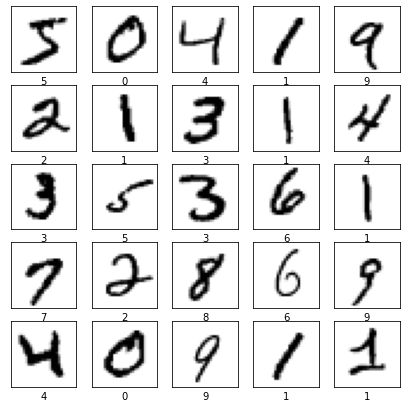

In [4]:
#verifying the data
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1);

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1);

train_images = train_images[0:6000]
train_labels = train_labels[0:6000]

In [6]:
train_images.shape

(6000, 28, 28, 1)

In [7]:
#creating the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
#model.add(layers.Dense(3136, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(train_images, train_labels))

Epoch 1/10
47/47 [==============================] - 7s 146ms/step - loss: 0.7586 - accuracy: 0.7903 - val_loss: 0.2612 - val_accuracy: 0.9260
Epoch 2/10
47/47 [==============================] - 7s 144ms/step - loss: 0.1982 - accuracy: 0.9408 - val_loss: 0.1277 - val_accuracy: 0.9648
Epoch 3/10
47/47 [==============================] - 7s 142ms/step - loss: 0.1214 - accuracy: 0.9655 - val_loss: 0.0945 - val_accuracy: 0.9735
Epoch 4/10
47/47 [==============================] - 7s 143ms/step - loss: 0.0883 - accuracy: 0.9733 - val_loss: 0.0733 - val_accuracy: 0.9807
Epoch 5/10
47/47 [==============================] - 7s 146ms/step - loss: 0.0733 - accuracy: 0.9803 - val_loss: 0.0485 - val_accuracy: 0.9863
Epoch 6/10
47/47 [==============================] - 7s 143ms/step - loss: 0.0489 - accuracy: 0.9838 - val_loss: 0.0317 - val_accuracy: 0.9923
Epoch 7/10
47/47 [==============================] - 7s 143ms/step - loss: 0.0353 - accuracy: 0.9913 - val_loss: 0.0202 - val_accuracy: 0.9965
Epoch 